# Multiple Linear Regression
## Bike Rental Case Study

#### Problem Statement:

To build a multiple linear regression model for the prediction of demand for shared bikes

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- To know the accuracy of the model, i.e. How well those variables describe(or predict) the bike demands
- To create a linear model that quantitatively relates bike demand with other variables


In [320]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Step 1: Reading and Understanding the Data


In [323]:
bk = pd.read_csv("day.csv")

In [324]:
bk.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [325]:
bk.shape

(730, 16)

In [326]:
bk.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [327]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step 2: Exploratory Data Analysis

-  Understand the data and derive some obvious inferences. 


### Convert non-numeric data to  numeric values
- convert non numeric into numeric data : dteday
- split into day,month and year
- As Month and year are already present no need to extract this from dteday
- delete dteday after fetching the day information

In [328]:
bk.dteday

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

In [329]:
bk["day"] = bk.dteday.apply(lambda x : x.split('-')[0])
bk.drop(columns=['dteday'], inplace=True)


In [330]:
bk.day=bk.day.astype("int32")


In [331]:
bk.head()
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
 15  day         730 non-null    int32  
dtypes: float64(4), int32(1), int64(11)
memory usage: 88.5 KB


### Redundant and not important columns that can be dropped
- Instant : This is not used to understand the correlation with demand, hence this can be dropped
- temp :  This is very similar to atemp. Hence keeping only atemp and removing temp
- Casual/registered/cnt : As the problem statement only seeks to understand the demand wrt other factors and no classification is needed wrt type of users, only cnt is used and casual and registered are dropped

In [332]:
bk.drop(columns=['instant'], inplace=True)
bk.drop(columns=['temp'], inplace=True)
bk.drop(columns=['casual'], inplace=True)
bk.drop(columns=['registered'], inplace=True)

In [333]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  day         730 non-null    int32  
dtypes: float64(3), int32(1), int64(8)
memory usage: 65.7 KB


In [334]:
bk.yr.value_counts()
bk.yr.unique


<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
725    1
726    1
727    1
728    1
729    1
Name: yr, Length: 730, dtype: int64>

### The year column : 
- As there are only two years in the data,  yr : year (0: 2018, 1:2019) 
- As the exact year number will not repeat itself again , instead of keeping the year we can add a derived column insted
- Derived column : impacted_by_pandemic : 1: yes / 0: no .As both 2018 and 2019 are not impacted by pandemic, they will be marked no ie,0
- With this the yr column can be dropped


In [335]:
bk["impacted_by_pandemic"] = 0
bk.drop(columns=['yr'], inplace=True)
bk.head()

,season,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day,impacted_by_pandemic
0,1,1,0,6,0,2,18.18125,80.5833,10.749882,985,1,0
1,1,1,0,0,0,2,17.68695,69.6087,16.652113,801,2,0
2,1,1,0,1,1,1,9.47025,43.7273,16.636703,1349,3,0
3,1,1,0,2,1,1,10.60610,59.0435,10.739832,1562,4,0
4,1,1,0,3,1,1,11.46350,43.6957,12.522300,1600,5,0


In [336]:
bk.drop(columns=['impacted_by_pandemic'], inplace=True)

### Data Visualization : Plot the numeric values

- Numeric values are: 
   - atemp , hum , windspeed 
    
- Categorical values are :
    - season, mnth, holiday, weeday, workingday, weathersit, day , impacted_by_pandemic
    
-

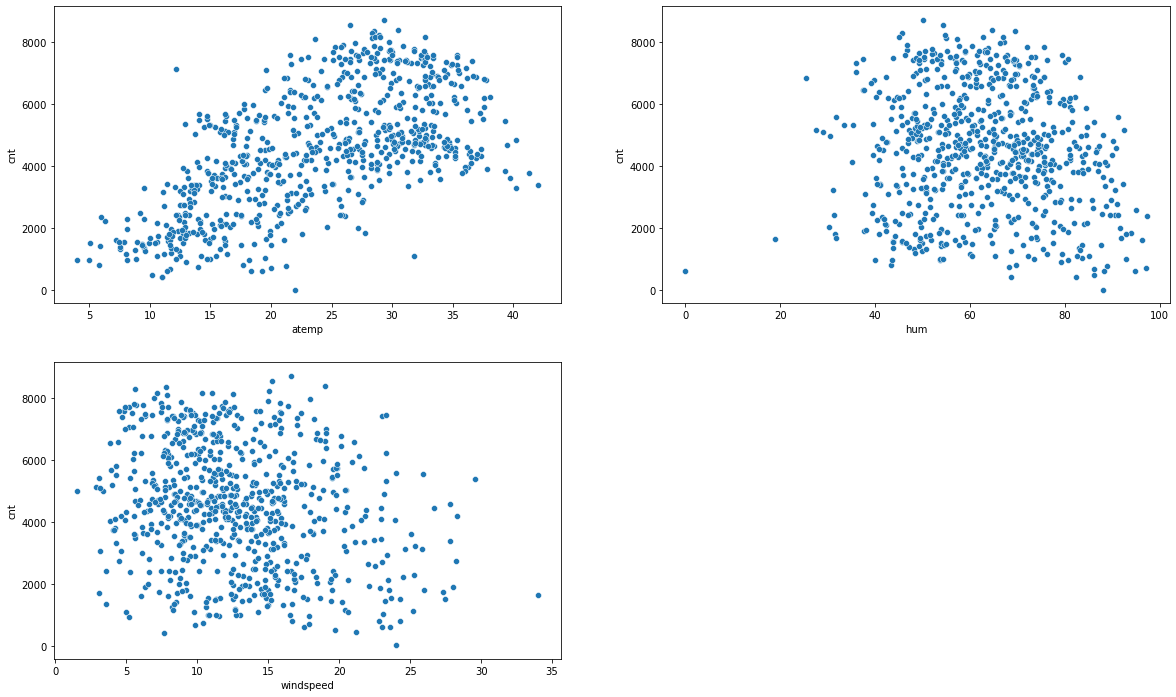

In [337]:
#plt.figure(figsize= (2,12))
#sns.pairplot(bk, x_vars=["season","mnth","holiday","weekday","workingday","weathersit","atemp","hum","windspeed","day","impacted_by_pandemic"], y_vars=["cnt"],size=2, aspect=1, kind='scatter')
#plt.show()

plt.figure(figsize= (20,12))
plt.subplot(2,2,1)
sns.scatterplot(x='atemp' ,y='cnt' , data=bk)
plt.subplot(2,2,2)
sns.scatterplot(x='hum' ,y='cnt' , data=bk)
plt.subplot(2,2,3)
sns.scatterplot(x='windspeed' ,y='cnt' , data=bk)
plt.show()

## Numeric values : Analysis 

- There seems to be some correlation with count for these variables:
 1. atemp
 2. hum
 3. windspeed


    

## Categorical values : Analysis
- Creating dummy variables for :  - season, mnth, holiday, weeday, workingday, weathersit, day 


In [338]:
status = pd.get_dummies(bk['season'] , drop_first=True)
status.columns = ['season1','season2','season3']
status.head()


,season1,season2,season3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [339]:
bk = pd.concat( [bk, status] , axis=1)
bk.head()


,season,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day,season1,season2,season3
0,1,1,0,6,0,2,18.18125,80.5833,10.749882,985,1,0,0,0
1,1,1,0,0,0,2,17.68695,69.6087,16.652113,801,2,0,0,0
2,1,1,0,1,1,1,9.47025,43.7273,16.636703,1349,3,0,0,0
3,1,1,0,2,1,1,10.60610,59.0435,10.739832,1562,4,0,0,0
4,1,1,0,3,1,1,11.46350,43.6957,12.522300,1600,5,0,0,0


In [340]:
status = pd.get_dummies(bk['mnth'] , drop_first=True )
status.columns = ['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']
status.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [341]:
bk = pd.concat( [bk, status] , axis=1)
bk.head()

,season,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11
0,1,1,0,6,0,2,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,2,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,1,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,2,1,1,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,3,1,1,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [342]:
status = pd.get_dummies(bk['holiday'] , drop_first=True)
status.columns = ['hol']
status.head()
bk = pd.concat( [bk, status] , axis=1)
bk.head()

,season,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,hol
0,1,1,0,6,0,2,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,2,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,1,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,2,1,1,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,3,1,1,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [343]:
status = pd.get_dummies(bk['weekday'] , drop_first=True)
status.columns = ['wd1','wd2','wd3','wd4','wd5','wd6']
status.head()
bk = pd.concat( [bk, status] , axis=1)
bk.head()

,season,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,m9,m10,m11,hol,wd1,wd2,wd3,wd4,wd5,wd6
0,1,1,0,6,0,2,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,2,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,1,9.47025,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,2,1,1,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,3,1,1,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,1,0,0,0


In [344]:
status = pd.get_dummies(bk['weathersit'] , drop_first=True)
status.columns = ['weather1','weather2']
status.head()
bk = pd.concat( [bk, status] , axis=1)
bk.head()

,season,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,m11,hol,wd1,wd2,wd3,wd4,wd5,wd6,weather1,weather2
0,1,1,0,6,0,2,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,1,1,0
1,1,1,0,0,0,2,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,1,1,1,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,2,1,1,10.60610,59.0435,10.739832,1562,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,3,1,1,11.46350,43.6957,12.522300,1600,...,0,0,0,0,1,0,0,0,0,0


In [345]:
##Drop redundant columns
bk=bk.drop('season', axis=1)
bk=bk.drop('mnth', axis=1)
bk=bk.drop('holiday', axis=1)
bk=bk.drop('weekday', axis=1)
bk=bk.drop('weathersit', axis=1)
bk=bk.drop('day', axis=1)

bk.head()

,workingday,atemp,hum,windspeed,cnt,season1,season2,season3,m1,m2,...,m11,hol,wd1,wd2,wd3,wd4,wd5,wd6,weather1,weather2
0,0,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [346]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [347]:
bk.head()

,workingday,atemp,hum,windspeed,cnt,season1,season2,season3,m1,m2,...,m11,hol,wd1,wd2,wd3,wd4,wd5,wd6,weather1,weather2
0,0,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Reshaping the data
- reshaping needed for :    atemp , hum , windspeed , cnt
- reshaping not neede for other variables

In [348]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed','cnt']

df_train.head()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,workingday,atemp,hum,windspeed,cnt,season1,season2,season3,m1,m2,...,m11,hol,wd1,wd2,wd3,wd4,wd5,wd6,weather1,weather2
653,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
728,0,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,0,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


## Dependent and independent variable(s) identification, y_train and X_train


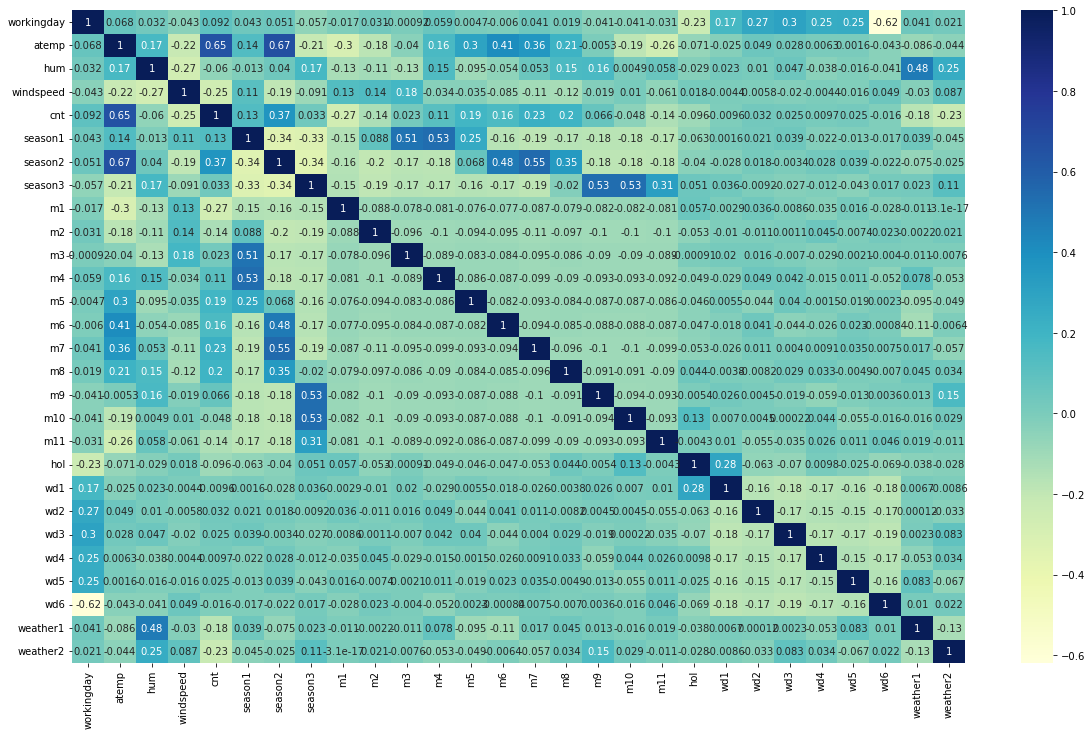

In [349]:
plt.figure(figsize= (20,12))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [350]:
y_train = df_train.pop('cnt')
X_train = df_train


## Using RFE (Recursive Feature Elimination) to decide on top independent features to select

In [351]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [352]:
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))



[('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season1', True, 1),
 ('season2', False, 7),
 ('season3', True, 1),
 ('m1', False, 12),
 ('m2', False, 8),
 ('m3', False, 9),
 ('m4', False, 10),
 ('m5', False, 18),
 ('m6', False, 6),
 ('m7', True, 1),
 ('m8', True, 1),
 ('m9', False, 14),
 ('m10', False, 4),
 ('m11', False, 5),
 ('hol', True, 1),
 ('wd1', False, 17),
 ('wd2', False, 11),
 ('wd3', False, 16),
 ('wd4', False, 13),
 ('wd5', False, 15),
 ('wd6', False, 3),
 ('weather1', True, 1),
 ('weather2', True, 1)]

In [353]:
col = X_train.columns[rfe.support_]
col

Index(['atemp', 'hum', 'windspeed', 'season1', 'season3', 'm7', 'm8', 'hol',
       'weather1', 'weather2'],
      dtype='object')

### Model1 by Selecting columns from RFE :
['atemp', 'hum', 'windspeed', 'season1', 'season3', 'm7', 'm8', 'hol',
       'weather1', 'weather2']
- R2 =49.4%
- holiday has high p value 0.053
- Rechecking VIF :  
- dropping "hum"  :  VIF : 21.26 , p = 0.009

In [354]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     69.48
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           5.91e-88
Time:                        23:06:46   Log-Likelihood:                 260.94
No. Observations:                 510   AIC:                            -499.9
Df Residuals:                     499   BIC:                            -453.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3741      0.043      8.715      0.000       0.290       0.458
atemp          0.6323      0.037     16.887      0.000       0.559       0.706
hum           -0.2894      0.061     -4.780      0.000      -0.408      -0.170
windspeed     -0.1669      0.042     -3.998      0.000      -0.249      -0.085
season1        0.1022      0.018      5.762      0.000       0.067       0.137
season3        0.1516      0.017      8.817      0.000       0.118       0.185
m7             0.0773      0.026      2.958      0.003       0.026       0.129
m8             0.1263      0.026      4.815      0.000       0.075       0.178
hol           -0.0983      0.042     -2.368      0.018      -0.180      -0.017
weather1      -0.0405      0.017     -2.376      0.018      -0.074      -0.007
weather2      -0.2388      0.043     -5.589      0.000      -0.323      -0.155
==============================================================================
Omnibus:                       10.616   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                6.864
Skew:                           0.130   Prob(JB):                       0.0323
Kurtosis:                       2.494   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
X_train_new = X_train_rfe.drop(['const'], axis=1)


In [356]:
def calculateVif(X_train) : 
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF' , ascending=False)
    print(vif)

In [357]:
calculateVif(X_train_new)

    Features    VIF
1        hum  14.62
0      atemp   9.47
2  windspeed   3.51
8   weather1   2.13
3    season1   1.83
4    season3   1.74
5         m7   1.55
6         m8   1.30
9   weather2   1.16
7        hol   1.04


In [358]:
X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)
X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train,X_train_rfe2).fit()  
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     71.54
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           4.21e-84
Time:                        23:06:46   Log-Likelihood:                 249.53
No. Observations:                 510   AIC:                            -479.1
Df Residuals:                     500   BIC:                            -436.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2124      0.027      7.870      0.000       0.159       0.265
atemp          0.5942      0.037     15.898      0.000       0.521       0.668
windspeed     -0.1125      0.041     -2.742      0.006      -0.193      -0.032
season1        0.0977      0.018      5.397      0.000       0.062       0.133
season3        0.1358      0.017      7.877      0.000       0.102       0.170
m7             0.0751      0.027      2.814      0.005       0.023       0.128
m8             0.1163      0.027      4.354      0.000       0.064       0.169
hol           -0.1010      0.042     -2.381      0.018      -0.184      -0.018
weather1      -0.0870      0.014     -6.077      0.000      -0.115      -0.059
weather2      -0.3189      0.040     -7.942      0.000      -0.398      -0.240
==============================================================================
Omnibus:                       15.513   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.672
Skew:                           0.127   Prob(JB):                       0.0131
Kurtosis:                       2.414   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [359]:
X_train_new = X_train_rfe2.drop(['const'], axis=1)
calculateVif(X_train_new)

    Features   VIF
0      atemp  4.46
1  windspeed  2.95
2    season1  1.82
4         m7  1.55
3    season3  1.50
7   weather1  1.48
5         m8  1.30
8   weather2  1.08
6        hol  1.04


## Prediction on test data 
### Apply all changes done to train data on the test data
- Apply scalar to test data (transform only) 
- Identify X and Y (pop)
- Add constant to test data 
- Drop columns in test if they were dropped during train

In [362]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
#num_vars = ['atemp', 'hum', 'windspeed']
num_vars = ['atemp', 'hum', 'windspeed','cnt']

df_test.head()
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,workingday,atemp,hum,windspeed,cnt,season1,season2,season3,m1,m2,...,m11,hol,wd1,wd2,wd3,wd4,wd5,wd6,weather1,weather2
184,0,-0.083584,0.006774,-0.088243,-0.002451,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
535,1,-0.081669,0.006287,-0.086013,-0.002449,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,1,-0.090764,0.008632,-0.080222,-0.002496,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
221,1,-0.082910,0.004504,-0.080050,-0.002468,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,1,-0.084324,0.003239,-0.073702,-0.002466,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [363]:
y_test = df_test.pop('cnt')
X_test = df_test

In [364]:
y_test.head()
X_test.columns

Index(['workingday', 'atemp', 'hum', 'windspeed', 'season1', 'season2',
       'season3', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10',
       'm11', 'hol', 'wd1', 'wd2', 'wd3', 'wd4', 'wd5', 'wd6', 'weather1',
       'weather2'],
      dtype='object')

In [365]:
X_train_rfe2.columns

Index(['const', 'atemp', 'windspeed', 'season1', 'season3', 'm7', 'm8', 'hol',
       'weather1', 'weather2'],
      dtype='object')

In [366]:
X_train_rfe2.head()

,const,atemp,windspeed,season1,season3,m7,m8,hol,weather1,weather2
653,1.0,0.501133,0.300794,0,1,0,0,0,0,0
576,1.0,0.766351,0.264686,0,0,0,0,0,0,0
426,1.0,0.438975,0.255342,0,0,0,0,0,1,0
728,1.0,0.200348,0.663106,0,0,0,0,0,0,0
482,1.0,0.391735,0.188475,1,0,0,0,0,1,0


In [367]:
X_test_new = X_test[X_train_new.columns]
X_test_sm = sm.add_constant(X_test_new)
#X_test_sm=X_test_new
X_test_sm.head()

,const,atemp,windspeed,season1,season3,m7,m8,hol,weather1,weather2
184,1.0,-0.083584,-0.088243,0,0,0,0,1,1,0
535,1.0,-0.081669,-0.086013,1,0,0,0,0,0,0
299,1.0,-0.090764,-0.080222,0,1,0,0,0,1,0
221,1.0,-0.082910,-0.080050,0,0,1,0,0,0,0
152,1.0,-0.084324,-0.073702,1,0,0,0,0,0,0


In [368]:
y_test_pred = lm.predict(X_test_sm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     71.54
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           4.21e-84
Time:                        23:08:03   Log-Likelihood:                 249.53
No. Observations:                 510   AIC:                            -479.1
Df Residuals:                     500   BIC:                            -436.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2124      0.027      7.870      0.000       0.159       0.265
atemp          0.5942      0.037     15.898      0.000       0.521       0.668
windspeed     -0.1125      0.041     -2.742      0.006      -0.193      -0.032
season1        0.0977      0.018      5.397      0.000       0.062       0.133
season3        0.1358      0.017      7.877      0.000       0.102       0.170
m7             0.0751      0.027      2.814      0.005       0.023       0.128
m8             0.1163      0.027      4.354      0.000       0.064       0.169
hol           -0.1010      0.042     -2.381      0.018      -0.184      -0.018
weather1      -0.0870      0.014     -6.077      0.000      -0.115      -0.059
weather2      -0.3189      0.040     -7.942      0.000      -0.398      -0.240
==============================================================================
Omnibus:                       15.513   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.672
Skew:                           0.127   Prob(JB):                       0.0131
Kurtosis:                       2.414   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Density'>

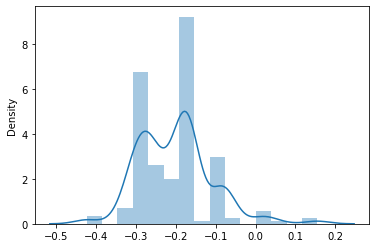

In [369]:
res = y_test-y_test_pred
fig = plt.figure()
sns.distplot(res, bins = 15)


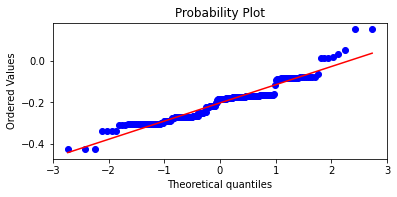

In [370]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)

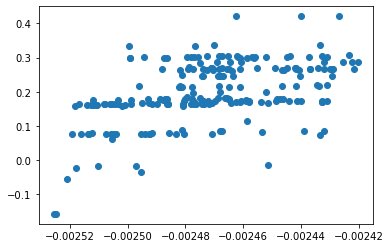

In [371]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)

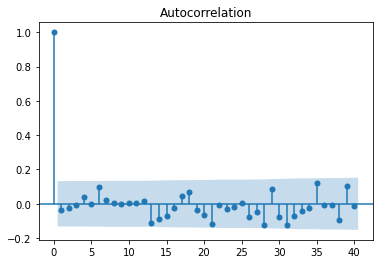

In [372]:
import statsmodels.tsa.api as smt
%matplotlib inline
acf = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
acf.show()

In [373]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_test_pred))

Mean squared error: 0.05
Coefficient of determination: -78156241.37
